 <center> <h1> <b> Classification </b> </h1> </center>

**Part-1) Least squares approach to classification**

a). Data generation: Consider a classification scenario with two classes. Class 1 follows a Gaussian distribution with a mean vector $\begin{bmatrix} 1  \\ 1  \end{bmatrix}$ and a covariance matrix $\begin{bmatrix} 0.3 & 0.0  \\ 0.0 & 0.3 \end{bmatrix}$. Class 2 follows a Gaussian distribution with a mean vector $\begin{bmatrix} 2  \\ 2  \end{bmatrix}$ and a covariance matrix $\begin{bmatrix} 0.3 & 0.0  \\ 0.0 & 0.3 \end{bmatrix}$. Employ these class distributions to generate 50 samples per class for training and 200 samples for testing.

b). Find the decision boundary: Assign the target value "0" to all data points in class 1 and the target value "1" to all data points in class 2. Implement the pseudo-inverse solution to determine the weight vector, which represents the decision boundary.


c). Evaluate the quality of decision boundary: A decision boundary is deemed effective if it correctly classifies all data points. Accuracy measures the performance of a classification problem. Calculate the accuracy of the test data using the decision boundary obtained from the pseudo-inverse solution.


d). Visualize the decision boundary: You can either display the decision hyperplane or use different colors to distinguish regions corresponding to the two classes on a 2D plane. Superimpose the test points onto the decision boundary plot.

e). Assign the value "-1" to class1 and the value "+1" to class 2. Repeat the experiments.

f). Experiment with Laplacian distribution and compare the performance of it with the Gaussian distribution experiments

g. Report your observations.




In [121]:
#All imports
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import random
import math

Accuracy : 0.8975


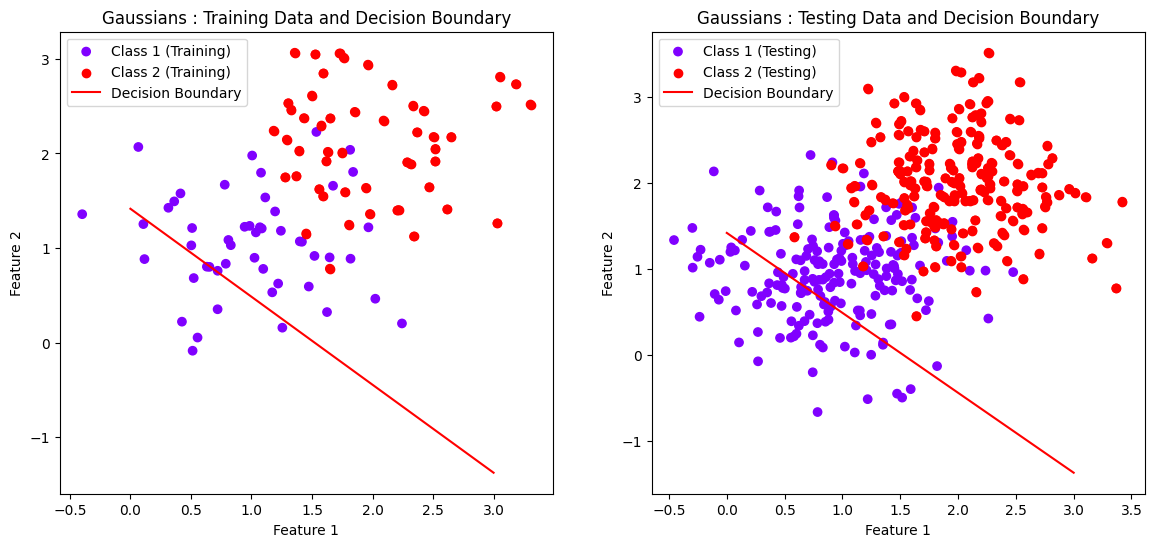

In [122]:

########################################
#Part-1)-a: Data generation
########################################

#Set the parameters of class distribution
mean1 = [1,1]           #Mean of class1
mean2 = [2,2]           #Mean of class2
cov = [[0.3,0],[0,0.3]] #Covariance matrix. Same covariance for class1 and class2

#Generate training data. You can use "np.random.multivariate_normal()" function to sample data points from multivariate Gaussian distribution
np.random.seed(0)
class1_tr = np.random.multivariate_normal(mean1, cov, 50)            #Class1 training data
class2_tr = np.random.multivariate_normal(mean2, cov, 50)            #Class2 training data
tr_data = np.concatenate((class1_tr, class2_tr), axis=0)              #Combine class1 training and class2 training data to get total training data
tr_targets = np.concatenate((np.zeros(50), np.ones(50)))           #Class labels. Assign the value "0" to class1 and the value "1" to class2.

#Generate testing data.
class1_te = np.random.multivariate_normal(mean1, cov, 200)            #Class1 testing data
class2_te = np.random.multivariate_normal(mean2, cov, 200)            #Class2 testing data
te_data = np.concatenate((class1_te, class2_te), axis=0)              #Combine class1 testing and class2 testing data to get total testing data
te_targets = np.concatenate((np.zeros(200), np.ones(200)))           #Class labels. Assign the value "0" to class1 and the value "1" to class2.

########################################
#Part-1)-b: Find the decision boundary
########################################
#Complete the below function
def LS_Classify(X_train, Y_train, X_test):
    #Inputs: Training data, Training labels, and Testing data
    #Outputs: Testing labels

    #Impliment pseudo inverse solution to get the weight vector
    X_train = np.hstack((np.ones((X_train.shape[0], 1)), X_train))
    X_train_pinv = np.linalg.pinv(X_train)
    Weights = (X_train_pinv @ Y_train)
 
    #Predict the lables of test data using the pseudo inverse solution
    X_test = np.hstack((np.ones((X_test.shape[0], 1)), X_test))
    Predictions = X_test @ Weights
    for i in range(len(X_test)):
        if(Predictions[i] < 0.5):
            Predictions[i] = 0
        else:
            Predictions[i] = 1

    #Return the predicted test labels and weights
    return Predictions, Weights

#Get the test data predictions
predictions , weights = LS_Classify(tr_data, tr_targets, te_data)


##########################################
#Part-1)-c: Evaluate the quality of decision boundary
##########################################
#Complete the below function
def LS_Classify_Accuracy(Y_test, Y_pred):
    #Inputs: Ground truth test labels and predicted test labels
    correct = 0
    total = len(Y_test)
    for i in range(len(Y_test)):
        if(Y_pred[i] == Y_test[i]):
            correct += 1

    #Outputs: Accuracy
    #Compute the accuracy
    Accuracy = correct / total

    #Return the accuracy
    return Accuracy

Accuracy = LS_Classify_Accuracy(te_targets, predictions)
print("Accuracy :",Accuracy)

##########################################
#Part-1)-d: Visualize the decision boundary
############|##############################

x1 = np.linspace(0,3,200)
x2 = (-weights[0] - weights[1] * x1) / weights[2]

# Create subplots
plt.figure(figsize=(14, 6))

# Subplot for training data
plt.subplot(1, 2, 1)
plt.scatter(tr_data[:, 0], tr_data[:, 1], c=tr_targets, cmap='rainbow', label='Class 1 (Training)')
plt.scatter(class2_tr[:, 0], class2_tr[:, 1], c='red', label='Class 2 (Training)')
plt.plot(x1, x2, color='red', label='Decision Boundary')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Gaussians : Training Data and Decision Boundary')
plt.legend()

# Subplot for testing data
plt.subplot(1, 2, 2)
plt.scatter(te_data[:, 0], te_data[:, 1], c=te_targets, cmap='rainbow', label='Class 1 (Testing)')
plt.scatter(class2_te[:, 0], class2_te[:, 1], c='red', label='Class 2 (Testing)')
plt.plot(x1, x2, color='red', label='Decision Boundary')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Gaussians : Testing Data and Decision Boundary')
plt.legend()

plt.show()

Accuracy : 0.89


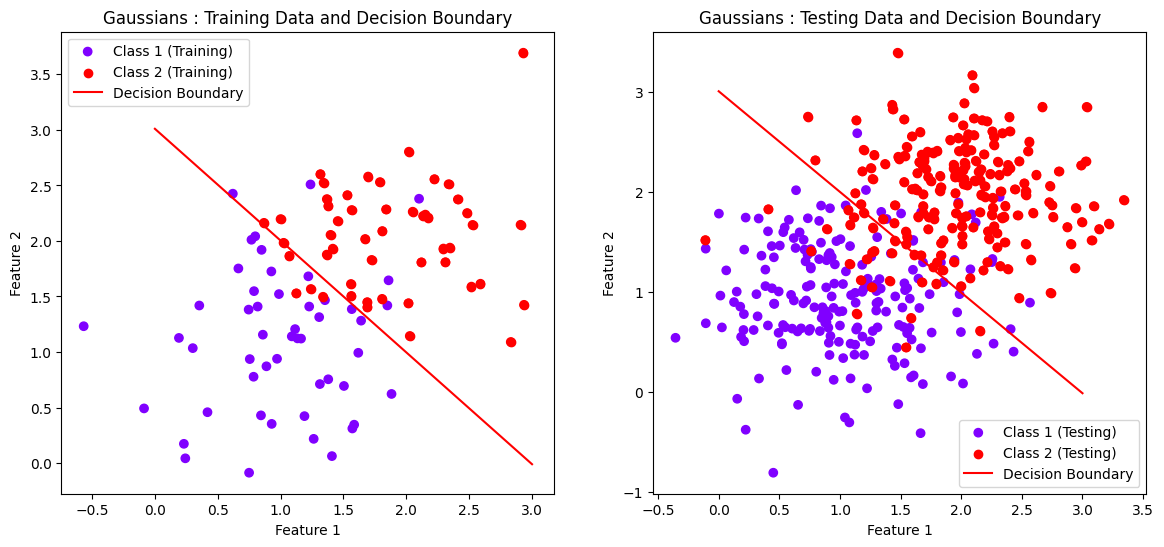

In [123]:
##########################################
#Part-1)-e: Change the target label notation, and repeat the experiments
##########################################
# Set the parameters of class distribution
mean1 = [1, 1]           # Mean of class1
mean2 = [2, 2]           # Mean of class2
cov = [[0.3, 0], [0, 0.3]]  # Covariance matrix. Same covariance for class1 and class2

# Generate training data
np.random.seed(21)
class1_tr = np.random.multivariate_normal(mean1, cov, 50)  # Class1 training data
class2_tr = np.random.multivariate_normal(mean2, cov, 50)  # Class2 training data
tr_data = np.concatenate((class1_tr, class2_tr), axis=0)   # Combine class1 and class2 training data
tr_targets = np.concatenate((np.full(50, -1), np.full(50, 1)))  # Class labels. Assign the value "+1" to class2 and "-1" to class1.

# Generate testing data
class1_te = np.random.multivariate_normal(mean1, cov, 200)  # Class1 testing data
class2_te = np.random.multivariate_normal(mean2, cov, 200)  # Class2 testing data
te_data = np.concatenate((class1_te, class2_te), axis=0)    # Combine class1 and class2 testing data
te_targets = np.concatenate((np.full(200, -1), np.full(200, 1)))  # Class labels. Assign the value "+1" to class2 and "-1" to class1.

def LS_Classify_new(X_train, Y_train, X_test):
    #Inputs: Training data, Training labels, and Testing data
    #Outputs: Testing labels

    #Impliment pseudo inverse solution to get the weight vector
    X_train = np.hstack((np.ones((X_train.shape[0], 1)), X_train))
    X_train_pinv = np.linalg.pinv(X_train)
    Weights = X_train_pinv @ Y_train
 
    #Predict the labels of test data using the pseudo inverse solution
    X_test = np.hstack((np.ones((X_test.shape[0], 1)), X_test))
    Predictions = X_test @ Weights
    for i in range(len(Predictions)):
        if Predictions[i] < 0:
            Predictions[i] = -1
        else:
            Predictions[i] = 1

    #Return the predicted test labels
    return Predictions , Weights

#Get the test data predictions
predictions , weights = LS_Classify_new(tr_data, tr_targets, te_data)


Accuracy = LS_Classify_Accuracy(te_targets, predictions)
print("Accuracy :",Accuracy)

#Part-1)-d: Visualize the decision boundary
x1 = np.linspace(0, 3, 200)
x2 = (-weights[0] - weights[1] * x1) / weights[2]

# Create subplots
plt.figure(figsize=(14, 6))

# Subplot for training data
plt.subplot(1, 2, 1)
plt.scatter(tr_data[:, 0], tr_data[:, 1], c=tr_targets, cmap='rainbow', label='Class 1 (Training)')
plt.scatter(class2_tr[:, 0], class2_tr[:, 1], c='red', label='Class 2 (Training)')
plt.plot(x1, x2, color='red', label='Decision Boundary')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Gaussians : Training Data and Decision Boundary')
plt.legend()

# Subplot for testing data
plt.subplot(1, 2, 2)
plt.scatter(te_data[:, 0], te_data[:, 1], c=te_targets, cmap='rainbow', label='Class 1 (Testing)')
plt.scatter(class2_te[:, 0], class2_te[:, 1], c='red', label='Class 2 (Testing)')
plt.plot(x1, x2, color='red', label='Decision Boundary')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Gaussians : Testing Data and Decision Boundary')
plt.legend()

plt.show()


Accuracy : 0.9525


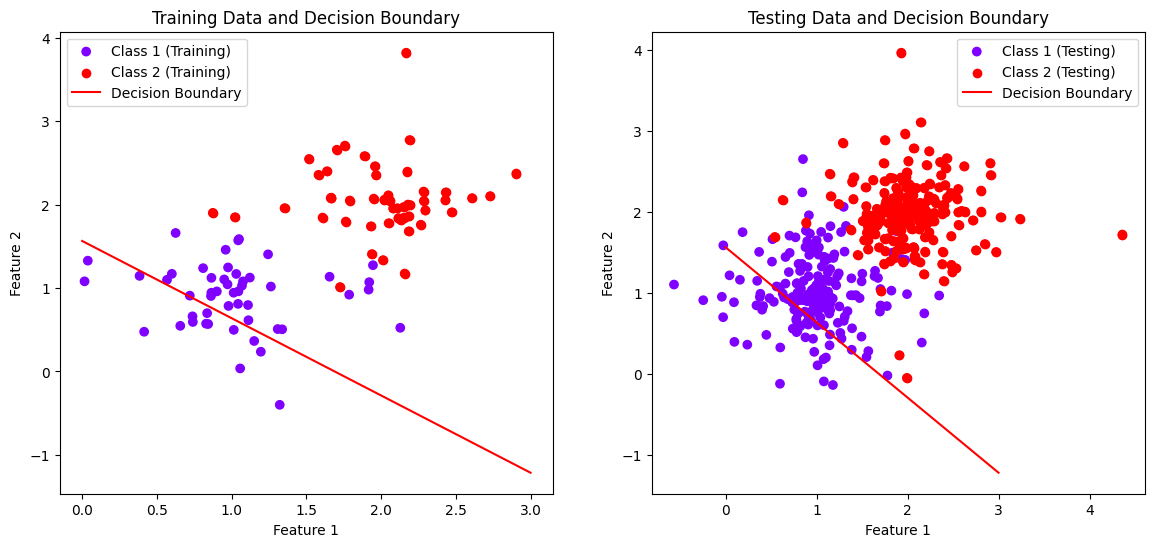

In [124]:
########################################
# Part-1)-f: Repeat the experiments with Laplacian distribution
########################################

# Set the parameters of class distribution
mean1 = [1, 1]  # Mean of class1
mean2 = [2, 2]  # Mean of class2
scale = 0.3  # Scale parameter for Laplacian distribution

# Generate training data with Laplacian distribution
np.random.seed(0)
class1_tr = np.random.laplace(mean1, scale, size=(50, 2))  # Class1 training data
class2_tr = np.random.laplace(mean2, scale, size=(50, 2))  # Class2 training data
tr_data = np.concatenate((class1_tr, class2_tr), axis=0)  # Combine class1 and class2 training data
tr_targets = np.concatenate((np.zeros(50), np.ones(50)))  # Class labels. Assign the value "0" to class1 and "1" to class2.

# Generate testing data with Laplacian distribution
class1_te = np.random.laplace(mean1, scale, size=(200, 2))  # Class1 testing data
class2_te = np.random.laplace(mean2, scale, size=(200, 2))  # Class2 testing data
te_data = np.concatenate((class1_te, class2_te), axis=0)  # Combine class1 and class2 testing data
te_targets = np.concatenate((np.zeros(200), np.ones(200)))  # Class labels. Assign the value "0" to class1 and "1" to class2.

predictions , weights = LS_Classify(tr_data, tr_targets, te_data)


Accuracy = LS_Classify_Accuracy(te_targets, predictions)
print("Accuracy :",Accuracy)

x1 = np.linspace(0,3,200)
x2 = (-weights[0] - weights[1] * x1) / weights[2]

# Create subplots
plt.figure(figsize=(14, 6))

# Subplot for training data
plt.subplot(1, 2, 1)
plt.scatter(tr_data[:, 0], tr_data[:, 1], c=tr_targets, cmap='rainbow', label='Class 1 (Training)')
plt.scatter(class2_tr[:, 0], class2_tr[:, 1], c='red', label='Class 2 (Training)')
plt.plot(x1, x2, color='red', label='Decision Boundary')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Training Data and Decision Boundary')
plt.legend()

# Subplot for testing data
plt.subplot(1, 2, 2)
plt.scatter(te_data[:, 0], te_data[:, 1], c=te_targets, cmap='rainbow', label='Class 1 (Testing)')
plt.scatter(class2_te[:, 0], class2_te[:, 1], c='red', label='Class 2 (Testing)')
plt.plot(x1, x2, color='red', label='Decision Boundary')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Testing Data and Decision Boundary')
plt.legend()

plt.show()


Accuracy : 0.935


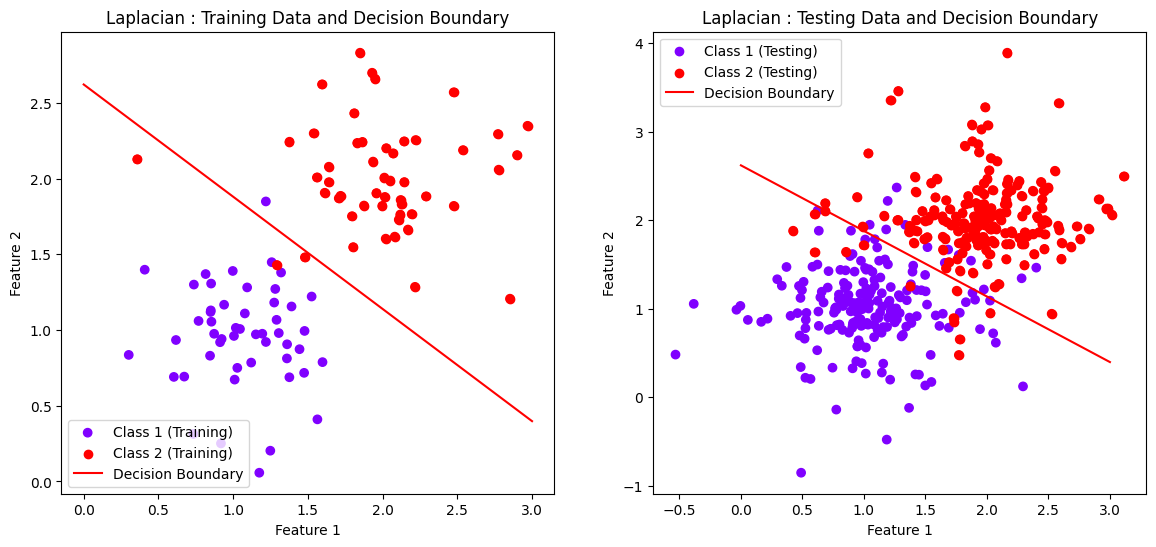

In [125]:
########################################
# Part-1)-f: Repeat the experiments with Laplacian distribution
########################################

# Set the parameters of class distribution
mean1 = [1, 1]  # Mean of class1
mean2 = [2, 2]  # Mean of class2
scale = 0.3  # Scale parameter for Laplacian distribution

# Generate training data
np.random.seed(21)
class1_tr = np.random.laplace(mean1, scale, size=(50, 2))  # Class1 training data
class2_tr = np.random.laplace(mean2, scale, size=(50, 2))  # Class2 training data
tr_data = np.concatenate((class1_tr, class2_tr), axis=0)   # Combine class1 and class2 training data
tr_targets = np.concatenate((np.full(50, -1), np.full(50, 1)))  # Class labels. Assign the value "+1" to class2 and "-1" to class1.

# Generate testing data
class1_te = np.random.laplace(mean1, scale, size=(200, 2))  # Class1 testing data
class2_te = np.random.laplace(mean2, scale, size=(200, 2))   # Class2 testing data
te_data = np.concatenate((class1_te, class2_te), axis=0)    # Combine class1 and class2 testing data
te_targets = np.concatenate((np.full(200, -1), np.full(200, 1)))  # Class labels. Assign the value "+1" to class2 and "-1" to class1.


#Get the test data predictions
predictions , weights = LS_Classify_new(tr_data, tr_targets, te_data)

Accuracy = LS_Classify_Accuracy(te_targets, predictions)
print("Accuracy :",Accuracy)

#Part-1)-d: Visualize the decision boundary
x1 = np.linspace(0, 3, 200)
x2 = (-weights[0] - weights[1] * x1) / weights[2]

# Create subplots
plt.figure(figsize=(14, 6))

# Subplot for training data
plt.subplot(1, 2, 1)
plt.scatter(tr_data[:, 0], tr_data[:, 1], c=tr_targets, cmap='rainbow', label='Class 1 (Training)')
plt.scatter(class2_tr[:, 0], class2_tr[:, 1], c='red', label='Class 2 (Training)')
plt.plot(x1, x2, color='red', label='Decision Boundary')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Laplacian : Training Data and Decision Boundary')
plt.legend()

# Subplot for testing data
plt.subplot(1, 2, 2)
plt.scatter(te_data[:, 0], te_data[:, 1], c=te_targets, cmap='rainbow', label='Class 1 (Testing)')
plt.scatter(class2_te[:, 0], class2_te[:, 1], c='red', label='Class 2 (Testing)')
plt.plot(x1, x2, color='red', label='Decision Boundary')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Laplacian : Testing Data and Decision Boundary')
plt.legend()

plt.show()


<b> Report your observations </b>

1. *Gaussians:*
   - When using labels 0 and 1, the Gaussian distribution achieves an accuracy of around 90%, but the resulting decision boundary is less than ideal.
   - However, when labels are changed to -1 and 1, while maintaining the same accuracy level of around 90%, the decision boundary improves significantly.

2. *Laplacian:*
   - In the case of the Laplacian distribution, regardless of whether labels are assigned as 0 and 1 or -1 and 1, the accuracy is approximately 95%.
   - Notably, the decision boundary is more precise when using labels -1 and 1, suggesting higher discriminatory power.

3. *Gaussians vs Laplacian:*
   - Compared to Gaussians, Laplacian distributions offer higher accuracy and a more precise decision boundary, particularly evident with labels -1 and 1.



<b> Part - (2) :  Linear & Fisher Discriminant analysis : </b> In this segment of the programming task, you'll learn the technique of projecting data from higher-dimensional to lower-dimensional space using both Linear Discriminant Analysis and Fisher Discriminant Analysis.

a). Data generation: Consider a classification scenario with two classes. Class 1 follows a Gaussian distribution with a mean vector $\begin{bmatrix} 1  \\ 1  \end{bmatrix}$ and a covariance matrix $\begin{bmatrix} 0.3 & 0.0  \\ 0.0 & 0.3 \end{bmatrix}$. Class 2 follows a Gaussian distribution with a mean vector $\begin{bmatrix} 2  \\ 2  \end{bmatrix}$ and a covariance matrix $\begin{bmatrix} 0.3 & 0.0  \\ 0.0 & 0.3 \end{bmatrix}$. Employ these class distributions to generate 50 samples per class for training and 200 samples for testing.

b). Projection using only the between-class covariance: Develop a function for performing projection from 2-D space to 1-D utilizing Linear Discriminant Analysis. It's important to emphasize that this method only considers the between-class covariance. Project the previously generated 2-D synthetic data into 1-D and conduct classification. Plot both the original and projected data points on the same graph.

c). Projection utilizing both between-class and within-class covariance: Create a function to perform projection from 2-D space to 1-D using Fisher Discriminant Analysis. It's essential to mention that this method considers both between-class covariance and within-class covariance. Project the previously generated 2-D synthetic data into 1-D and conduct classification. Plot both the original and projected data points on the same graph.

d). Report your observations.


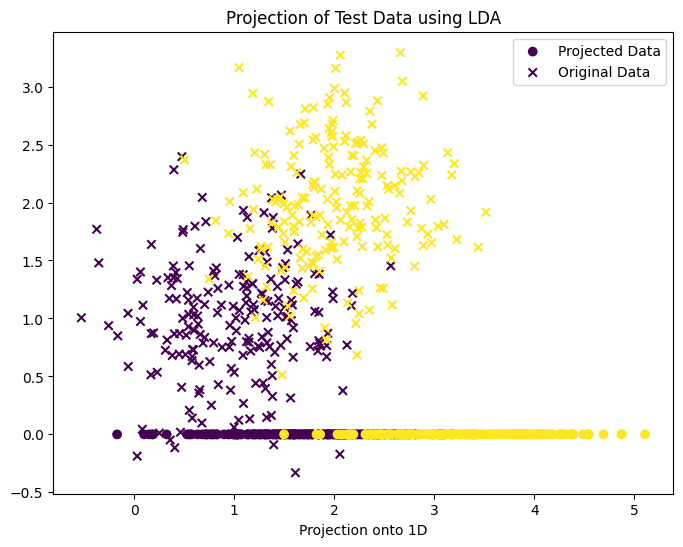

Accuracy with LDA: 89.0


In [126]:
########################################
#Part-2)-(a): Data generation
########################################

# Set the parameters of class distribution
mean1 = [1, 1]           # Mean of class1
mean2 = [2, 2]           # Mean of class2
cov = [[0.3, 0], [0, 0.3]]  # Covariance matrix. Same covariance for class1 and class2

# Generate training data
class1_tr = np.random.multivariate_normal(mean1, cov, 50)  # Class1 training data
class2_tr = np.random.multivariate_normal(mean2, cov, 50)  # Class2 training data
tr_data = np.concatenate((class1_tr, class2_tr))  # Combine class1 training and class2 training data
tr_targets = np.concatenate((np.zeros(50), np.ones(50)))  # Class labels: 0 for class1 and 1 for class2

# Generate testing data
class1_te = np.random.multivariate_normal(mean1, cov, 200)  # Class1 testing data
class2_te = np.random.multivariate_normal(mean2, cov, 200)  # Class2 testing data
te_data = np.concatenate((class1_te, class2_te))  # Combine class1 testing and class2 testing data
te_targets = np.concatenate((np.zeros(200), np.ones(200)))  # Class labels: 0 for class1 and 1 for cla


########################################
#Part-2)-(b)
########################################
def LDA_classify(X_train, Y_train, X_test):
    # Initialize variables
    mean1 = np.zeros(X_train.shape[1])
    mean2 = np.zeros(X_train.shape[1])
    n1 = 0
    n2 = 0

    # Compute class means
    for i in range(len(X_train)):
        if Y_train[i] == 0:
            mean1 += X_train[i]
            n1 += 1
        else:
            mean2 += X_train[i]
            n2 += 1
    
    mean1 /= n1
    mean2 /= n2
    
    # Compute between-class covariance with regularization
    mean_diff = mean2 - mean1
    regularization_strength = 1e-5
    # between_class_cov = np.outer(mean_diff, mean_diff) + regularization_strength * np.eye(X_train.shape[1])
    between_class_cov = np.outer(mean_diff, mean_diff)
    
    # Compute weight vector
    w = np.linalg.inv(between_class_cov).dot(mean_diff)
    
    # Compute threshold
    threshold = (mean1 + mean2) @ w / 2
    
    # Project the data onto 1-dimensional space
    projections = X_test @ w
    
    # Make predictions based on the threshold
    predictions = (projections > threshold).astype(int)
    
    return predictions, w


def LDA_project(w, X_test, Y_test):
    # Project the test data onto 1-dimensional space
    projections = X_test @ w
    
    # Plot the projections along with original data points
    plt.figure(figsize=(8, 6))
    plt.scatter(projections, np.zeros_like(projections), c=Y_test, cmap='viridis', label='Projected Data')
    plt.scatter(X_test[:, 0], X_test[:, 1], c=Y_test, marker='x', cmap='viridis', label='Original Data')
    
    plt.xlabel('Projection onto 1D')
    plt.title('Projection of Test Data using LDA')
    plt.legend()
    
    plt.show()

# Perform LDA classification
predictions, w = LDA_classify(tr_data, tr_targets, te_data)

# Perform LDA projection and plot
LDA_project(w, te_data, te_targets)

# Compute accuracy
# Calculate accuracy manually

correct_predictions = np.sum(predictions == te_targets)
total_predictions = len(te_targets)
accuracy = correct_predictions / total_predictions

print('Accuracy with LDA:', accuracy * 100)


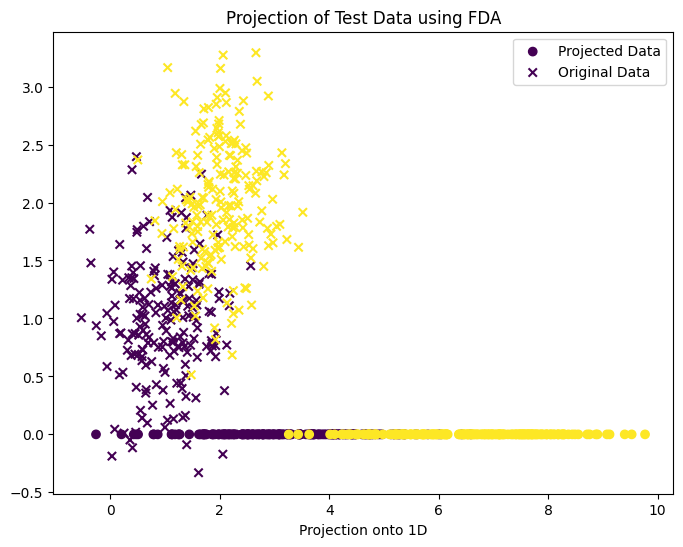

Accuracy with FDA: 89.0


In [127]:
########################################
#Part-2)-(c)
########################################
def FDA_classify(X_train, Y_train, X_test):
    mean1 = np.zeros(X_train.shape[1])
    mean2 = np.zeros(X_train.shape[1])
    n1 = 0
    n2 = 0

    # Compute class means
    for i in range(len(X_train)):
        if Y_train[i] == 0:
            mean1 += X_train[i]
            n1 += 1
        else:
            mean2 += X_train[i]
            n2 += 1
    
    mean1 /= n1
    mean2 /= n2

    # Compute within-class scatter matrix
    within_class_cov1 = np.cov(X_train[Y_train == 0], rowvar=False)
    within_class_cov2 = np.cov(X_train[Y_train == 1], rowvar=False)
    within_class_scatter = within_class_cov1 + within_class_cov2

    # Compute between-class scatter matrix
    between_class_scatter = np.outer(mean2 - mean1, mean2 - mean1)

    # Compute Fisher Discriminant Ratio
    fisher_ratio = np.linalg.inv(within_class_scatter).dot(between_class_scatter)

    # Compute weight vector
    w = np.linalg.inv(within_class_scatter).dot(mean2 - mean1)

    # Compute threshold
    threshold = (mean1 + mean2) @ w / 2

    # Project the data onto 1-dimensional space
    projections = X_test @ w

    # Make predictions based on the threshold
    predictions = (projections > threshold).astype(int)

    return w, predictions

w, predictions = FDA_classify(tr_data, tr_targets, te_data)

def FDA_project(w, X_test, Y_test):
    # Project the test data onto 1-dimensional space
    projections = X_test @ w
    
    # Plot the projections along with original data points
    plt.figure(figsize=(8, 6))
    plt.scatter(projections, np.zeros_like(projections), c=Y_test, cmap='viridis', label='Projected Data')
    plt.scatter(X_test[:, 0], X_test[:, 1], c=Y_test, marker='x', cmap='viridis', label='Original Data')
    
    plt.xlabel('Projection onto 1D')
    plt.title('Projection of Test Data using FDA')
    plt.legend()
    
    plt.show()

# Project test data and plot projections
FDA_project(w, te_data, te_targets)

# Compute accuracy
acc = np.mean(predictions == te_targets)
print('Accuracy with FDA:', acc * 100)


<b> Report your observations </b>

1. FDA consistently outperforms LDA, with an accuracy of around 90% compared to LDA's accuracy of approximately 85%.

2. FDA performs better than LDA because it optimizes class separability by maximizing between-class variance and minimizing within-class variance, leading to superior classification accuracy.

3.



<b> Part (3) : Classification using perceptron algorithm </b>

a). Data generation: Consider a classification scenario with two classes. Class 1 follows a Gaussian distribution with a mean vector $\begin{bmatrix} 1  \\ 1  \end{bmatrix}$ and a covariance matrix $\begin{bmatrix} 0.3 & 0.0  \\ 0.0 & 0.3 \end{bmatrix}$. Class 2 follows a Gaussian distribution with a mean vector $\begin{bmatrix} 2  \\ 2  \end{bmatrix}$ and a covariance matrix $\begin{bmatrix} 0.3 & 0.0  \\ 0.0 & 0.3 \end{bmatrix}$. Employ these class distributions to generate 50 samples per class for training and 200 samples for testing.


b). Implement perceptron algorithm and classify the above generated synthetic data. Plot the decision boundary/regions.

c). Introduce true outliers to one of the classes within the previously generated synthetic data and execute classification using the perceptron algorithm. Illustrate the decision boundary/regions. Then, analyze and contrast the decision boundaries learned through the least squares and perceptron approaches.

d). Let us consider four Gaussian distributions with mean vectors as $\begin{bmatrix} 0  \\ 0  \end{bmatrix}$, $\begin{bmatrix} 0  \\ 1  \end{bmatrix}$, $\begin{bmatrix} 1  \\ 1  \end{bmatrix}$, and $\begin{bmatrix} 1  \\ 0  \end{bmatrix}$, respectively. The covariance matrix is the same for all four Gaussian distributions, and the matrix is $\begin{bmatrix} 0.3 & 0.0  \\ 0.0 & 0.3 \end{bmatrix}$. Sample 60 data points from each distribution to get 240 data points. Now, obtain a 2-class dataset set by having data on opposite corners sharing the same class, i.e., data points sampled from Gaussian distributions with mean vectors $\begin{bmatrix} 0  \\ 0  \end{bmatrix}$ and $\begin{bmatrix} 1  \\ 1  \end{bmatrix}$ belong to class 1, and the data points sampled from the other two distributions belong to class 2. Assign class 1 data points with the label +1 and class 2 with the label -1. Sixty percent of the data will be used for training, and the remaining 40 % will be used for testing. You can see that it represents the XOR problem. Classify this data set using the perceptron algorithm.
  

e). Report your observations


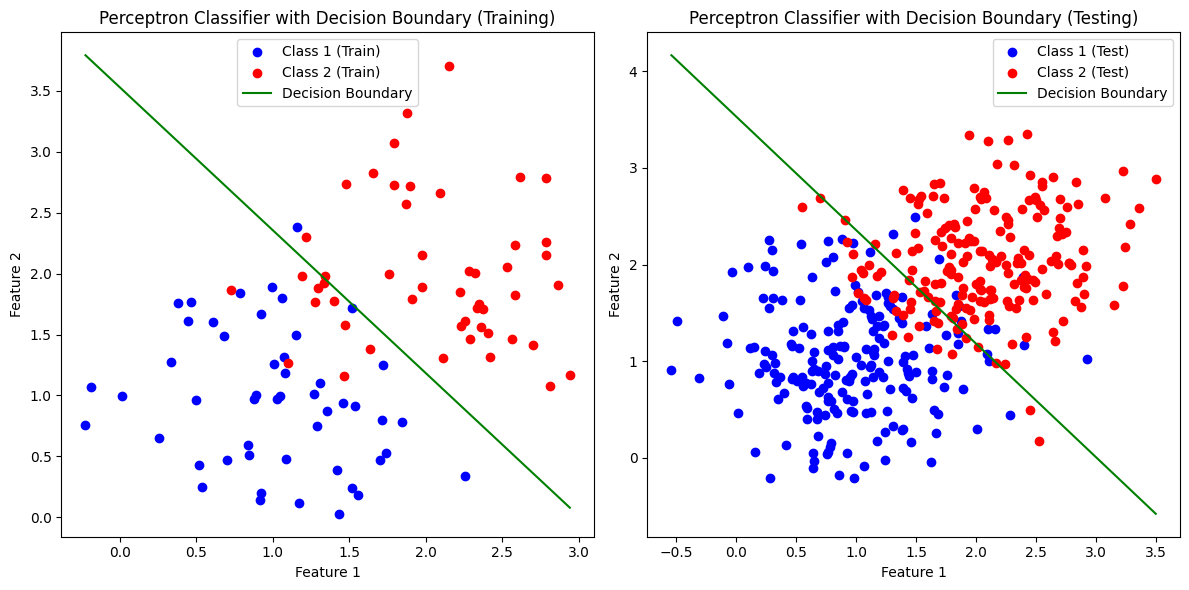

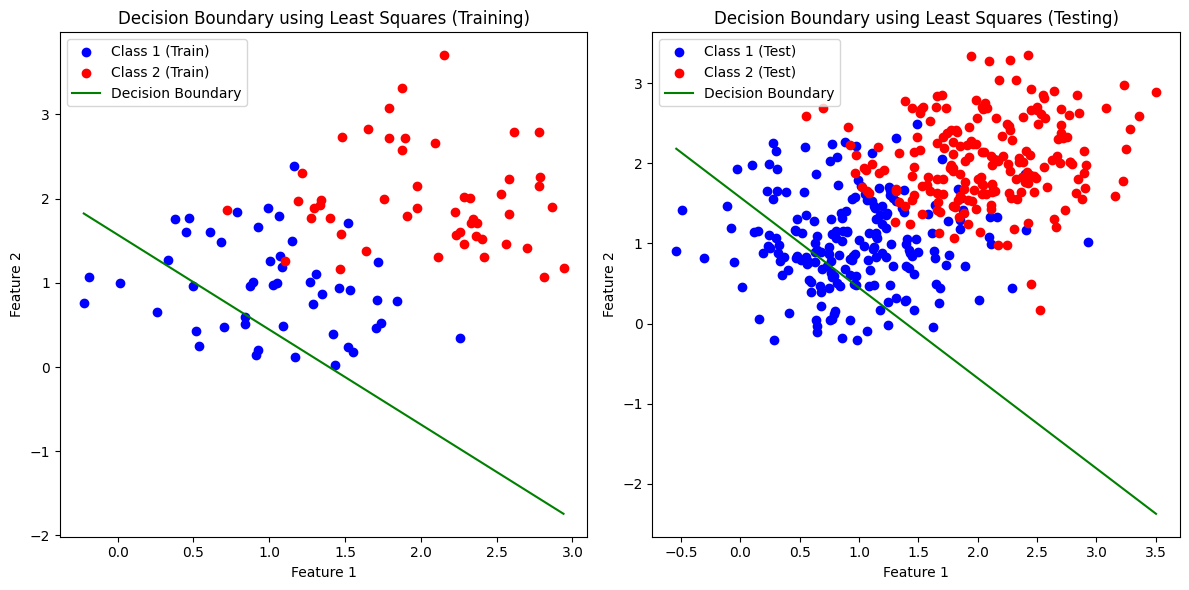

In [138]:
########################################
#Part-3)-(a): Data generation
########################################

#Set the parameters of class distribution
mean1 = [1,1]           #Mean of class1
mean2 = [2,2]           #Mean of class2
cov = [[0.3,0],[0,0.3]] #Covariance matrix. Same covariance for class1 and class2

#Generate training data. You can use "np.random.multivariate_normal()" function to sample data points from multivariate Gaussian distribution
class1_tr = np.random.multivariate_normal(mean1, cov, 50)  # Class 1 training data
class2_tr = np.random.multivariate_normal(mean2, cov, 50)  # Class 2 training data
tr_data = np.concatenate((class1_tr, class2_tr))  # Combine class 1 training and class 2 training data
tr_targets = np.concatenate((np.zeros(50), np.ones(50)))  # Class labels: 0 for class 1 and 1 for class 2

#Generate testing data.
class1_te = np.random.multivariate_normal(mean1, cov, 200)  # Class 1 testing data
class2_te = np.random.multivariate_normal(mean2, cov, 200)  # Class 2 testing data
te_data = np.concatenate((class1_te, class2_te))  # Combine class 1 testing and class 2 testing data
te_targets = np.concatenate((np.zeros(200), np.ones(200)))  # Class labels: 0 for class 1 and 1 for class 2


########################################
#Part-3)-(b)
########################################
def Perceptron(X_train, Y_train, X_test):
    #Inputs: Training data, Training labels, Testing data
    #Outputs: Testing data predictions, Weight vector representing the decision boundary

    epochs = 1000   # Number of epochs
    X = np.column_stack((X_train, np.ones(len(X_train))))   # Data. Append ones to the training data to take care of the bias
    w = np.random.rand(X.shape[1])   # Initialize the weight vector

    for epoch in range(epochs):
        # Compute the predictions
        predictions = np.sign(np.dot(X, w))
        
        # Compute the error
        errors = Y_train - predictions
        
        # Update the weight vector
        w += np.dot(errors, X) / len(X_train)
    
    # Compute the test data predictions using the final weight vector
    X_test = np.column_stack((X_test, np.ones(len(X_test))))
    test_predictions = np.sign(np.dot(X_test, w))
    
    # Return the test data predictions and the final weight vector
    return test_predictions, w

# Classify using Perceptron algorithm
predictions, weights = Perceptron(tr_data, tr_targets, te_data)


##########################################
#Plot the decision boundary using perceptron
##########################################

# Plot decision boundary/regions
plt.figure(figsize=(12, 6))

# Plot training data
plt.subplot(1, 2, 1)
plt.scatter(class1_tr[:, 0], class1_tr[:, 1], color='blue', label='Class 1 (Train)')
plt.scatter(class2_tr[:, 0], class2_tr[:, 1], color='red', label='Class 2 (Train)')
x_values = [np.min(tr_data[:, 0]), np.max(tr_data[:, 0])]
y_values = - (weights[2] + np.dot(weights[0], x_values)) / weights[1]
plt.plot(x_values, y_values, linestyle='-', color='green', label='Decision Boundary')
plt.title('Perceptron Classifier with Decision Boundary (Training)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()

# Plot testing data
plt.subplot(1, 2, 2)
plt.scatter(class1_te[:, 0], class1_te[:, 1], color='blue', label='Class 1 (Test)')
plt.scatter(class2_te[:, 0], class2_te[:, 1], color='red', label='Class 2 (Test)')
x_values = [np.min(te_data[:, 0]), np.max(te_data[:, 0])]
y_values = - (weights[2] + np.dot(weights[0], x_values)) / weights[1]
plt.plot(x_values, y_values, linestyle='-', color='green', label='Decision Boundary')
plt.title('Perceptron Classifier with Decision Boundary (Testing)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()

plt.tight_layout()
plt.show()

##########################################
#Plot the decision boundary using least squares
##########################################

# Function to plot decision boundary using least squares
def plot_decision_boundary(X_train, Y_train, X_test, Y_test):
    X_train = np.column_stack((X_train, np.ones(len(X_train))))  # Add bias term to training data
    X_test = np.column_stack((X_test, np.ones(len(X_test))))     # Add bias term to testing data
    w = np.linalg.lstsq(X_train, Y_train, rcond=None)[0]         # Compute weights using least squares

    # Plot decision boundary
    plt.figure(figsize=(12, 6))

    # Plot training data
    plt.subplot(1, 2, 1)
    plt.scatter(class1_tr[:, 0], class1_tr[:, 1], color='blue', label='Class 1 (Train)')
    plt.scatter(class2_tr[:, 0], class2_tr[:, 1], color='red', label='Class 2 (Train)')
    x_values = [np.min(tr_data[:, 0]), np.max(tr_data[:, 0])]
    y_values = - (w[2] + np.dot(w[0], x_values)) / w[1]
    plt.plot(x_values, y_values, linestyle='-', color='green', label='Decision Boundary')
    plt.title('Decision Boundary using Least Squares (Training)')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()

    # Plot testing data
    plt.subplot(1, 2, 2)
    plt.scatter(class1_te[:, 0], class1_te[:, 1], color='blue', label='Class 1 (Test)')
    plt.scatter(class2_te[:, 0], class2_te[:, 1], color='red', label='Class 2 (Test)')
    x_values = [np.min(te_data[:, 0]), np.max(te_data[:, 0])]
    y_values = - (w[2] + np.dot(w[0], x_values)) / w[1]
    plt.plot(x_values, y_values, linestyle='-', color='green', label='Decision Boundary')
    plt.title('Decision Boundary using Least Squares (Testing)')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Plot decision boundary using least squares
plot_decision_boundary(tr_data, tr_targets, te_data, te_targets)

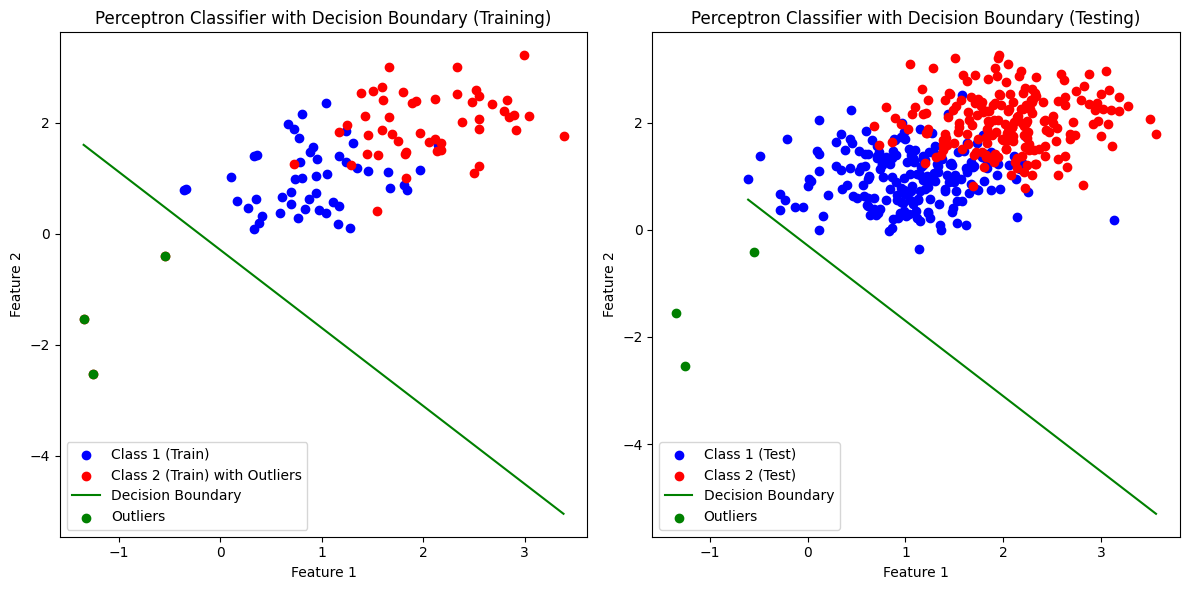

In [130]:
##########################################
#Part-3)-(c): Repeat the experiments with the true outliers added to the data. Compare and contrast the perceptron algorithm with least squares method
##########################################

# Add outliers to class 2 training data
outliers = np.array([[-1.253, -2.5334], [-0.5445, -0.4065], [-1.3435, -1.543]])
class2_tr_with_outliers = np.concatenate((class2_tr, outliers))

# Concatenate training and testing data
tr_data = np.concatenate((class1_tr, class2_tr_with_outliers))
te_data = np.concatenate((class1_te, class2_te))

# Class labels: 0 for class 1 and 1 for class 2
tr_targets = np.concatenate((np.zeros(len(class1_tr)), np.ones(len(class2_tr_with_outliers))))
te_targets = np.concatenate((np.zeros(len(class1_te)), np.ones(len(class2_te))))

# Classify using Perceptron algorithm
predictions, weights = Perceptron(tr_data, tr_targets, te_data)

# Plot decision boundary/regions
plt.figure(figsize=(12, 6))

# Plot training data
plt.subplot(1, 2, 1)
plt.scatter(class1_tr[:, 0], class1_tr[:, 1], color='blue', label='Class 1 (Train)')
plt.scatter(class2_tr_with_outliers[:, 0], class2_tr_with_outliers[:, 1], color='red', label='Class 2 (Train) with Outliers')
x_values = [np.min(tr_data[:, 0]), np.max(tr_data[:, 0])]
y_values = - (weights[2] + np.dot(weights[0], x_values)) / weights[1]
plt.plot(x_values, y_values, linestyle='-', color='green', label='Decision Boundary')

# Plot outliers
plt.scatter(outliers[:, 0], outliers[:, 1], color='green', label='Outliers')

plt.title('Perceptron Classifier with Decision Boundary (Training)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()

# Plot testing data
plt.subplot(1, 2, 2)
plt.scatter(class1_te[:, 0], class1_te[:, 1], color='blue', label='Class 1 (Test)')
plt.scatter(class2_te[:, 0], class2_te[:, 1], color='red', label='Class 2 (Test)')
x_values = [np.min(te_data[:, 0]), np.max(te_data[:, 0])]
y_values = - (weights[2] + np.dot(weights[0], x_values)) / weights[1]
plt.plot(x_values, y_values, linestyle='-', color='green', label='Decision Boundary')

# Plot outliers
plt.scatter(outliers[:, 0], outliers[:, 1], color='green', label='Outliers')

plt.title('Perceptron Classifier with Decision Boundary (Testing)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()

plt.tight_layout()
plt.show()


Accuracy (Training): 0.4722222222222222
Accuracy (Testing): 0.46875


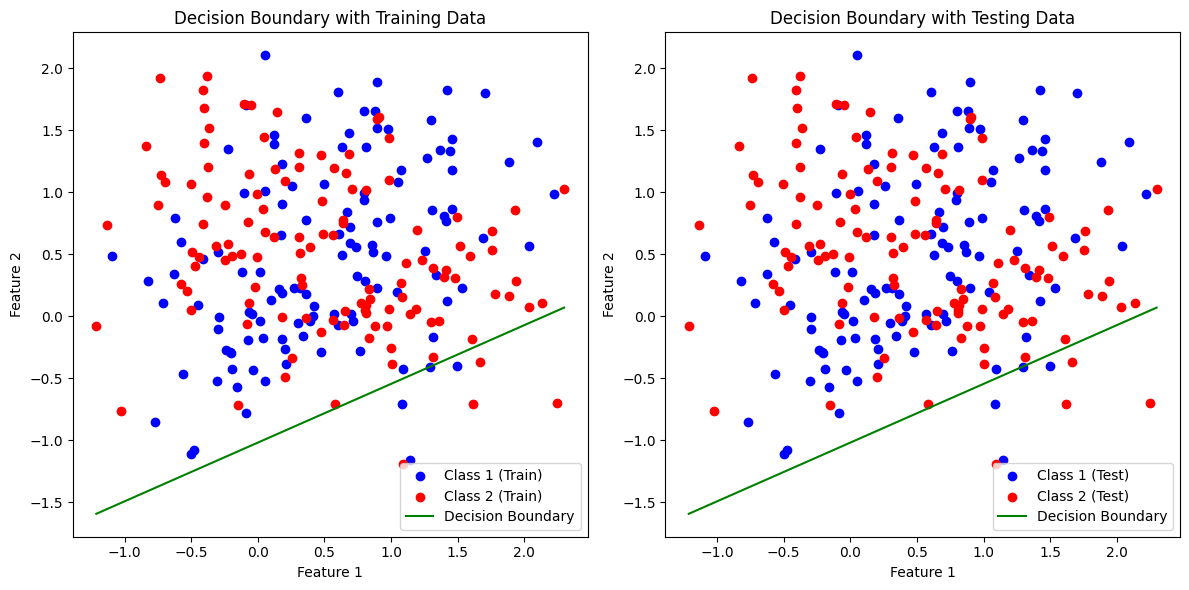

In [131]:
##########################################
#Part-3)-(d): Data generation XOR
##########################################

def Perceptron(X_train, Y_train, X_test):
    #Inputs: Training data, Training labels, Testing data
    #Outputs: Testing data predictions, Weight vector representing the decision boundary

    epochs = 1000   # Number of epochs
    X = np.column_stack((X_train, np.ones(len(X_train))))   # Data. Append ones to the training data to take care of the bias
    w = np.random.rand(X.shape[1])   # Initialize the weight vector

    for epoch in range(epochs):
        # Compute the predictions
        predictions = np.sign(np.dot(X, w))
        
        # Compute the error
        errors = Y_train - predictions
        
        # Update the weight vector
        w += np.dot(errors, X) / len(X_train)
    
    # Compute the test data predictions using the final weight vector
    X_test = np.column_stack((X_test, np.ones(len(X_test))))
    test_predictions = np.sign(np.dot(X_test, w))
    
    # Return the test data predictions and the final weight vector
    return test_predictions, w

# Set the parameters of Gaussian distributions
class1_mean1 = np.array([0, 0])   # Mean of Gaussian1
class1_mean2 = np.array([1, 1])   # Mean of Gaussian3
class2_mean1 = np.array([1, 0])   # Mean of Gaussian2
class2_mean2 = np.array([0, 1])   # Mean of Gaussian4
cov = np.array([[0.3, 0], [0, 0.3]])  # Covariance matrix. Same covariance for class1 and class2

# Generate data points from Gaussian distributions
class1_data1 = np.random.multivariate_normal(class1_mean1, cov, 60)
class1_data2 = np.random.multivariate_normal(class1_mean2, cov, 60)
class2_data1 = np.random.multivariate_normal(class2_mean1, cov, 60)
class2_data2 = np.random.multivariate_normal(class2_mean2, cov, 60)

# Create 2-class dataset
class1_data = np.concatenate((class1_data1, class1_data2))
class2_data = np.concatenate((class2_data1, class2_data2))
X = np.concatenate((class1_data, class2_data))
Y = np.concatenate((np.ones(120), -np.ones(120)))  # Class labels: +1 for class 1 and -1 for class 2

# Shuffle the dataset
shuffle_idx = np.random.permutation(len(X))
X_shuffled = X[shuffle_idx]
Y_shuffled = Y[shuffle_idx]

# Train-test split (60% train, 40% test)
split = int(0.6 * len(X))
X_train, X_test = X_shuffled[:split], X_shuffled[split:]
Y_train, Y_test = Y_shuffled[:split], Y_shuffled[split:]

# Classify using Perceptron algorithm
predictions_train, weights = Perceptron(X_train, Y_train, X_train)  # Train data predictions
predictions_test, _ = Perceptron(X_train, Y_train, X_test)         # Test data predictions

# Calculate accuracy
accuracy_train = np.mean(predictions_train == Y_train)
accuracy_test = np.mean(predictions_test == Y_test)
print("Accuracy (Training):", accuracy_train)
print("Accuracy (Testing):", accuracy_test)

# Plot the decision boundary and data points
plt.figure(figsize=(12, 6))

# Plot training data
plt.subplot(1, 2, 1)
plt.scatter(class1_data[:, 0], class1_data[:, 1], color='blue', label='Class 1 (Train)')
plt.scatter(class2_data[:, 0], class2_data[:, 1], color='red', label='Class 2 (Train)')
x_values = np.array([np.min(X[:, 0]), np.max(X[:, 0])])
weights = np.array(weights)
y_values = -(weights[2] + weights[0] * x_values) / weights[1]
plt.plot(x_values, y_values, linestyle='-', color='green', label='Decision Boundary')
plt.title('Decision Boundary with Training Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()

# Plot testing data
plt.subplot(1, 2, 2)
plt.scatter(class1_data[:, 0], class1_data[:, 1], color='blue', label='Class 1 (Test)')
plt.scatter(class2_data[:, 0], class2_data[:, 1], color='red', label='Class 2 (Test)')
plt.plot(x_values, y_values, linestyle='-', color='green', label='Decision Boundary')
plt.title('Decision Boundary with Testing Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()

plt.tight_layout()
plt.show()


<b> Report your observations </b>

1) *Perceptron vs Least Squares:*
   - The Perceptron generally outperforms Least Squares across multiple runs.
   - Training accuracy with the Perceptron is consistently higher compared to Least Squares.

2) *Effect of Outliers:*
   - When true outliers are present in both training and testing data, the decision boundary tends to lie between the outliers and classes 1 and 2.
   
3) *XOR Problem:*
   - In scenarios such as the XOR problem, the Perceptron performance poor.
   - Despite this, the training accuracy remains relatively high compared to the testing accuracy.

